In [3]:

from sentence_transformers import SentenceTransformer, util

# Load pre-trained embedding model
model = SentenceTransformer("all-MiniLM-L6-v2")

# Corpus
docs = [
    "AI detects algae in water",
    "AI predicts pollution levels",
    "IoT sensors monitor lakes",
    "Transformers are used in NLP",
    "Machine learning improves water quality"
]

query = "Artificial intelligence for water quality monitoring"

# Encode
doc_emb = model.encode(docs, convert_to_tensor=True)
query_emb = model.encode(query, convert_to_tensor=True)

# Compute similarity
hits = util.semantic_search(query_emb, doc_emb, top_k=3)[0]

# Print top results
for hit in hits:
    print(f"{docs[hit['corpus_id']]}  (Score: {hit['score']:.3f})")


Machine learning improves water quality  (Score: 0.737)
AI predicts pollution levels  (Score: 0.590)
AI detects algae in water  (Score: 0.556)


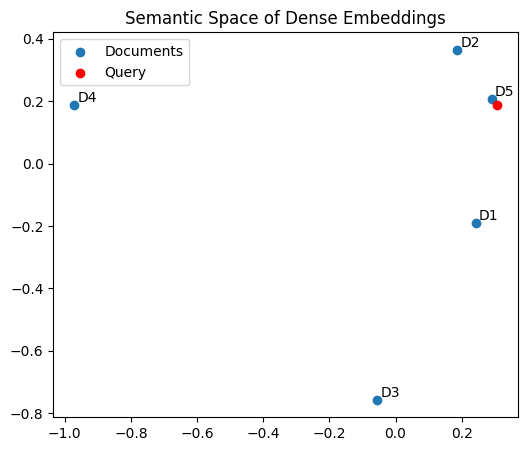

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Ensure tensors are on CPU before converting
doc_emb_cpu = doc_emb.cpu().numpy()
query_emb_cpu = query_emb.cpu().numpy()

# Combine
pca = PCA(n_components=2)
proj = pca.fit_transform(np.vstack([doc_emb_cpu, query_emb_cpu]))

# Plot
plt.figure(figsize=(6,5))
plt.scatter(proj[:-1,0], proj[:-1,1], label='Documents')
plt.scatter(proj[-1,0], proj[-1,1], color='red', label='Query')

for i, text in enumerate(docs):
    plt.annotate(f"D{i+1}", (proj[i,0]+0.01, proj[i,1]+0.01))

plt.legend()
plt.title("Semantic Space of Dense Embeddings")
plt.show()
